# Variational Auto Encoder

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.autonotebook import tqdm
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec    
import os
import scipy.stats

import numpy as np

In [8]:
batch_size = 256
image_dim = 784 

transform = transforms.Compose([
    transforms.ToTensor(), # convert to tensor
    transforms.Lambda(lambda x: x.view(image_dim)) # flatten into vector
    ])

train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    ,train=True
    ,download=True
    ,transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size
)

In [9]:
class Encoder(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.fc2_sigma = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        mu = self.fc2(x)
        logsigma = self.fc2_sigma(x)
        return(mu, logsigma)
        
class Decoder(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return(x)

In [27]:
def sample(mu, log_sigma2):
    eps = torch.randn(mu.shape[0], mu.shape[1])
    return mu + torch.exp(log_sigma2 / 2) * eps

In [25]:
embedding_dim = 2
enc_hidden_units = 512
dec_hidden_units = 512
nEpoch = 10

In [28]:
enc = Encoder(image_dim, enc_hidden_units, embedding_dim)
dec = Decoder(embedding_dim, dec_hidden_units, image_dim)
optimizer = optim.Adam(chain(enc.parameters(), dec.parameters()), lr=1e-3)


In [29]:
loss_plot = []

for epoch in range(nEpoch):
    losses = []
    trainloader = tqdm(train_loader)

    for i, data in enumerate(trainloader, 0):
        inputs, _ = data

        optimizer.zero_grad()

        mu, log_sigma2 = enc(inputs)
        z = sample(mu, log_sigma2)
        outputs = dec(z)

        recon = F.binary_cross_entropy(outputs, inputs, reduction='sum') / inputs.shape[0] #average in batch
        kl = torch.mean(-0.5 * torch.sum(1 + log_sigma2 - mu ** 2 - log_sigma2.exp(), dim = 1), dim = 0)
         
        #loss is the binary cross entropy loss between the input to the encoder and output of the decoder, and the KL divergence 

        loss = recon + kl 
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        trainloader.set_postfix(loss=np.mean(losses), epoch=epoch)
    
    loss_plot.append(np.average(losses))

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

In [30]:
outputs_d = outputs.detach().numpy()
outputs_d.shape = (96, 28, 28)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


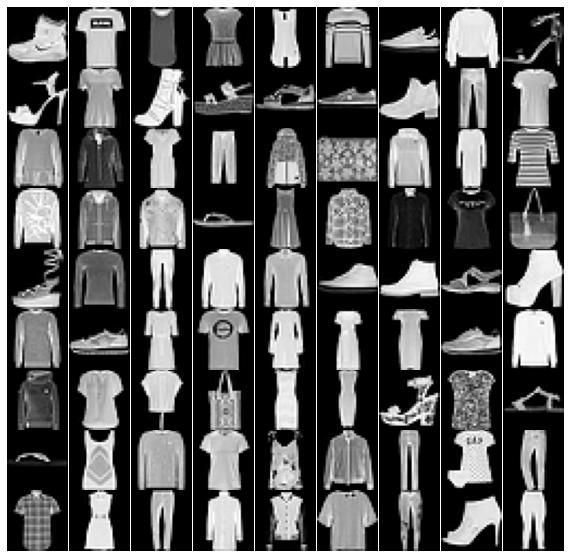

In [24]:

fig, ax = plt.subplots(9, 9, figsize = (10, 10))
# fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
# fig.axis('off')
for i in range(9):
  for j in range(9):



    ax[i][j].imshow(train_set.train_data[i*9+j], cmap=plt.get_cmap('gray'))
    ax[i][j].axis('off')
    # print(i*9+j)
plt.subplots_adjust(wspace=0, hspace=0)

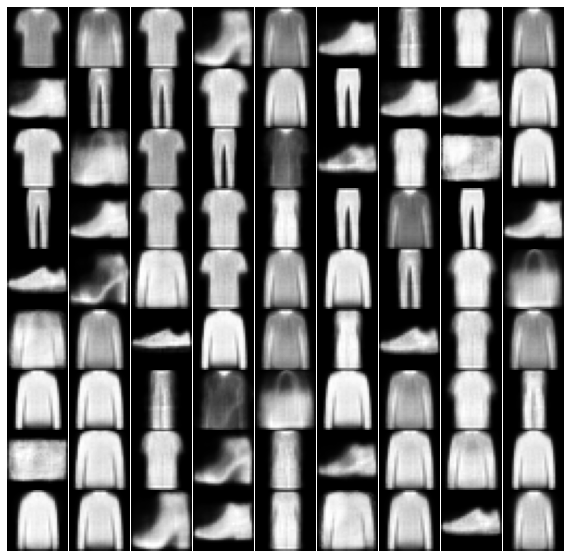

In [ ]:

fig, ax = plt.subplots(9, 9, figsize = (10, 10))
# fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
# fig.axis('off')
for i in range(9):
  for j in range(9):



    ax[i][j].imshow(outputs_d[i*9+j], cmap=plt.get_cmap('gray'))
    ax[i][j].axis('off')
    # print(i*9+j)
plt.subplots_adjust(wspace=0, hspace=0)

In [ ]:
mu.shape, log_sigma2.shape

(torch.Size([96, 2]), torch.Size([96, 2]))

In [31]:
def sample_latent_space(sample_index, sigma_multiplier):

  mean = mu[sample_index].detach().numpy()
  sigma = log_sigma2[sample_index].detach().numpy()
  

  
  x = np.linspace(mean[0] + sigma[0] *sigma_multiplier, mean[0] - sigma[0]*sigma_multiplier, 21)
  y = np.linspace(mean[1] - sigma[1] *sigma_multiplier, mean[1] + sigma[1]*sigma_multiplier, 21)


  sample_img = np.zeros((28*21, 28*21))

  size = 21

  for row in range(size):
    for col in range(size):
      out = dec(torch.Tensor([x[row],  y[col]])).detach().numpy().reshape(28, 28)
      sample_img[col*28:col*28+28, row*28: row*28+28] = out

  plt.figure(figsize = (10, 10))
  plt.axis("off")
  plt.imshow(sample_img, cmap=plt.get_cmap('gray'))

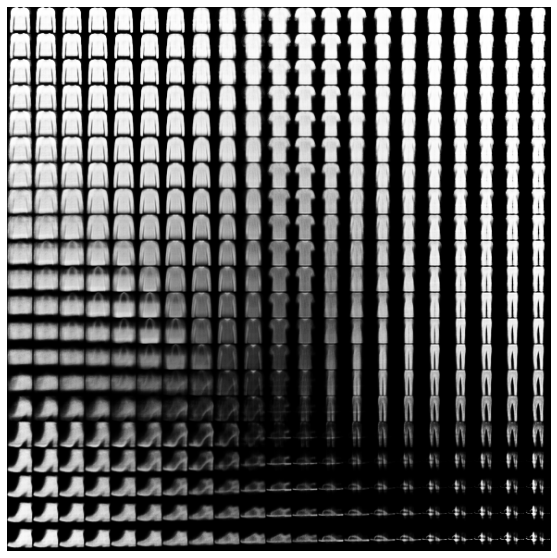

In [36]:
sample_latent_space(0, 0.4)

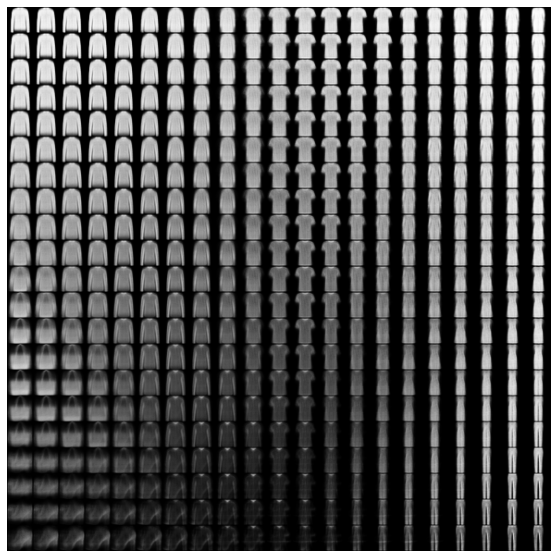

In [37]:
sample_latent_space(0, 0.2)